In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading an cleaning data

## Reading in a data file

In [4]:
df = pd.read_csv('data/NOAA_QCLCD_2011_hourly_13904.csv', header=-1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


## Re-assigning column names

In [6]:
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
column_labels_list = column_labels.split(',')
len(column_labels_list)

44

In [7]:
df.columns = column_labels_list
df.head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


## Drop unuse columns

In [10]:
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']

df_dropped = df.drop(list_to_drop, axis='columns')
df_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


## Cleaning and tidying datetime data

In [16]:
# Change int to string
df_dropped['date'] = df_dropped['date'].astype(str)
df_dropped['date'][0]

'20110101'

In [17]:
# Time 组增加0
df_dropped['Time'] = df_dropped['Time'].apply(lambda x: '{:0>4}'.format(x))
df_dropped['Time'][0]

'0053'

In [18]:
date_string = df_dropped['date'] + df_dropped['Time']
date_string.head()

0    201101010053
1    201101010153
2    201101010253
3    201101010353
4    201101010453
dtype: object

In [19]:
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')
date_times.head()

0   2011-01-01 00:53:00
1   2011-01-01 01:53:00
2   2011-01-01 02:53:00
3   2011-01-01 03:53:00
4   2011-01-01 04:53:00
dtype: datetime64[ns]

In [23]:
df_clean = df_dropped.set_index(date_times)
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


## Cleaning the numeric columns

In [25]:
df_clean.loc['2011-June-20 8AM' : '2011-June-20 9AM', 'dry_bulb_faren']

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
2011-06-20 09:08:00    84
2011-06-20 09:53:00    88
Name: dry_bulb_faren, dtype: object

In [28]:
# 将非numberic的数字转成Nan
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')
df_clean.loc['2011-June-20 8AM' : '2011-June-20 9AM', 'dry_bulb_faren']

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
2011-06-20 09:08:00    84.0
2011-06-20 09:53:00    88.0
Name: dry_bulb_faren, dtype: float64

In [29]:
df_clean['visibility'] = pd.to_numeric(df_clean['visibility'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.0,51.0,10.6,38,3.1,15.0,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.0,51.0,10.6,37,3.0,14.0,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.0,51.0,10.6,37,2.9,13.0,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.0,50.0,10.0,38,3.1,17.0,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.0,50.0,10.0,37,2.8,15.0,-9.4,25,11,020,29.51,30.04


# Statistical exploratory data analysis

## Signal min, max, median

In [30]:
df_clean['dry_bulb_faren'].median()

72.0

In [31]:
df_clean.loc['2011-Apr':'2011-Jun','dry_bulb_faren'].median()

78.0

In [34]:
df_clean.loc['2011-Jan','dry_bulb_faren'].median()

48.0

## Signal variance

In [75]:
df_climate =pd.read_csv('data/temperature_with_date.csv', parse_dates=True, index_col='Date')
df_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2008-01-01 00:00:00,41.4,39.6,0.8
2008-01-01 01:00:00,40.1,33.7,0.3
2008-01-01 02:00:00,46.4,37.4,1.7
2008-01-01 03:00:00,44.3,37.2,0.7
2008-01-01 04:00:00,47.5,38.6,1.6


In [76]:
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.0,51.0,10.6,38,3.1,15.0,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.0,51.0,10.6,37,3.0,14.0,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.0,51.0,10.6,37,2.9,13.0,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.0,50.0,10.0,38,3.1,17.0,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.0,50.0,10.0,37,2.8,15.0,-9.4,25,11,020,29.51,30.04


In [91]:
daily_climate = df_climate.resample('D').mean()
daily_climate.head()

,Temperature,DewPoint,Pressure
Date,,,
2008-01-01,44.758333,35.925000,1.216667
2008-01-02,44.791667,35.454167,1.504167
2008-01-03,45.183333,34.687500,1.504167
2008-01-04,44.958333,36.091667,1.704167
2008-01-05,44.900000,35.454167,1.654167


In [92]:
daily_clean = df_clean.resample('D').mean()
daily_clean.head()

,Wban,StationType,visibility,dry_bulb_faren,dew_point_faren
2011-01-01,13904,12,10.000000,50.166667,20.500000
2011-01-02,13904,12,10.000000,39.416667,19.708333
2011-01-03,13904,12,10.000000,46.846154,35.500000
2011-01-04,13904,12,5.071429,53.367347,50.408163
2011-01-05,13904,12,7.672414,57.965517,40.068966


In [93]:
# 要比较的是 2011年度 climate.Temperature 和 clean.dry_bulb_faren 的差值
daily_clean_values = daily_clean['dry_bulb_faren']
daily_clean_values.head()

2011-01-01    50.166667
2011-01-02    39.416667
2011-01-03    46.846154
2011-01-04    53.367347
2011-01-05    57.965517
Freq: D, Name: dry_bulb_faren, dtype: float64

In [104]:
daily_climate_values = daily_climate.loc[daily_clean.index]['Temperature']
daily_climate_values.head()

2011-01-01    45.516667
2011-01-02    45.158333
2011-01-03    44.920833
2011-01-04    45.208333
2011-01-05    45.091667
Freq: D, Name: Temperature, dtype: float64

In [105]:
(daily_clean_values - daily_climate_values).mean()

24.407610226910347

# Sunny and Cloudy

In [106]:
# 计算Sunny day 和 Cloudy day的 Temperatures 差别
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.0,51.0,10.6,38,3.1,15.0,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.0,51.0,10.6,37,3.0,14.0,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.0,51.0,10.6,37,2.9,13.0,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.0,50.0,10.0,38,3.1,17.0,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.0,50.0,10.0,37,2.8,15.0,-9.4,25,11,020,29.51,30.04


In [111]:
sunny = df_clean.loc[df_clean['sky_condition'] == 'CLR']
sunny.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 13:53:00,13904,20110101,1353,12,CLR,10.0,59.0,15.0,45,7.0,26.0,-3.3,28,14,010,29.63,30.16
2011-01-01 14:53:00,13904,20110101,1453,12,CLR,10.0,59.0,15.0,45,7.2,27.0,-2.8,29,16,360,29.63,30.16
2011-01-01 15:53:00,13904,20110101,1553,12,CLR,10.0,57.0,13.9,44,6.6,27.0,-2.8,32,11,350,29.63,30.17
2011-01-01 16:53:00,13904,20110101,1653,12,CLR,10.0,55.0,12.8,43,6.1,27.0,-2.8,34,13,040,29.65,30.18
2011-01-01 17:53:00,13904,20110101,1753,12,CLR,10.0,50.0,10.0,40,4.5,26.0,-3.3,39,10,040,29.66,30.21


In [113]:
overcast = df_clean.loc[df_clean['sky_condition'].str.contains('OVC')]
overcast.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.0,51.0,10.6,38,3.1,15.0,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.0,51.0,10.6,37,3.0,14.0,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.0,51.0,10.6,37,2.9,13.0,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.0,50.0,10.0,38,3.1,17.0,-8.3,27,7,350,29.51,30.03
2011-01-03 07:53:00,13904,20110103,0753,12,OVC055,10.0,37.0,2.8,35,1.4,31.0,-0.6,79,0,000,29.68,30.24


In [118]:
sunny_daily_max = sunny.resample('1D').max()
overcast_daily_max = overcast.resample('1D').max()

sunny_daily_max.mean() - overcast_daily_max.mean()

Wban               0.000000
StationType        0.000000
visibility         0.174359
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
dtype: float64

# Weekly average temperature and visibility

In [120]:
weekly_mean = df_clean[['visibility', 'dry_bulb_faren']].resample('W').mean()
weekly_mean.head()

,visibility,dry_bulb_faren
2011-01-02,10.000000,44.791667
2011-01-09,8.275785,50.246637
2011-01-16,6.451651,41.103774
2011-01-23,8.370853,47.194313
2011-01-30,9.966851,53.486188


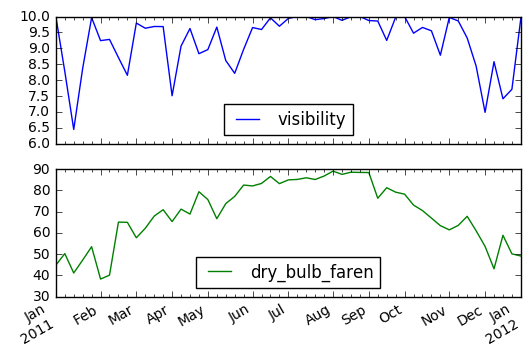

In [121]:
weekly_mean.plot(subplots=True)
plt.show()

# Daily hours of clear sky

In [123]:
sunny = df_clean['sky_condition'] == 'CLR'
sunny.head()

2011-01-01 00:53:00    False
2011-01-01 01:53:00    False
2011-01-01 02:53:00    False
2011-01-01 03:53:00    False
2011-01-01 04:53:00    False
Name: sky_condition, dtype: bool

In [124]:
sunny_hours = sunny.resample('d').sum()
sunny_hours.head()

2011-01-01    11.0
2011-01-02     7.0
2011-01-03     3.0
2011-01-04     0.0
2011-01-05     1.0
Freq: D, Name: sky_condition, dtype: float64

In [126]:
total_hours = sunny.resample('d').count()
total_hours.head()

2011-01-01    24
2011-01-02    24
2011-01-03    26
2011-01-04    49
2011-01-05    29
Freq: D, Name: sky_condition, dtype: int64

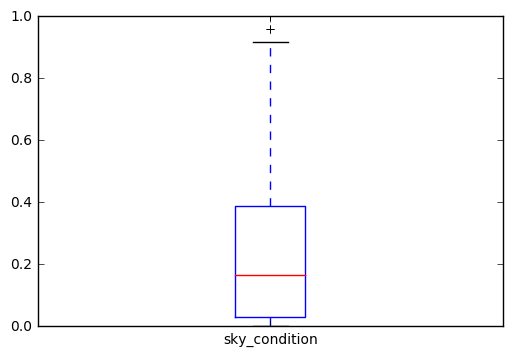

In [127]:
sunny_fraction = sunny_hours / total_hours
sunny_fraction.plot(kind='box')
plt.show()

# Heat or humidity

In [128]:
monthly_max = df_clean[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()
monthly_max.head()

,dew_point_faren,dry_bulb_faren
2011-01-31,63.0,80.0
2011-02-28,70.0,85.0
2011-03-31,68.0,87.0
2011-04-30,73.0,93.0
2011-05-31,76.0,100.0


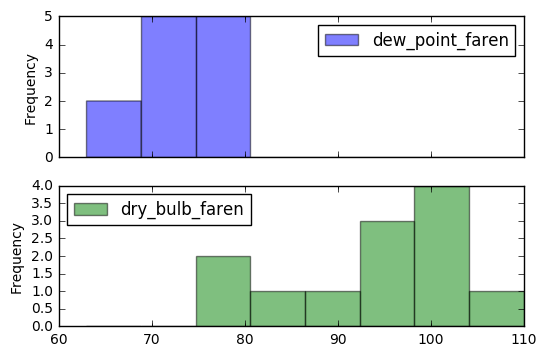

In [130]:
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)
plt.show()

# Probability of high temperatures

In [131]:
august_max = df_climate.loc['2010-August']['Temperature'].max()
august_max

50.0

In [135]:
august_2011 = df_clean['dry_bulb_faren'].resample('D').max()
august_2011.head()

2011-01-01    59.0
2011-01-02    55.0
2011-01-03    58.0
2011-01-04    57.0
2011-01-05    71.0
Freq: D, Name: dry_bulb_faren, dtype: float64

In [136]:
august_2011_high = august_2011.loc[august_2011 > august_max]
august_2011_high.head()

2011-01-01    59.0
2011-01-02    55.0
2011-01-03    58.0
2011-01-04    57.0
2011-01-05    71.0
Name: dry_bulb_faren, dtype: float64

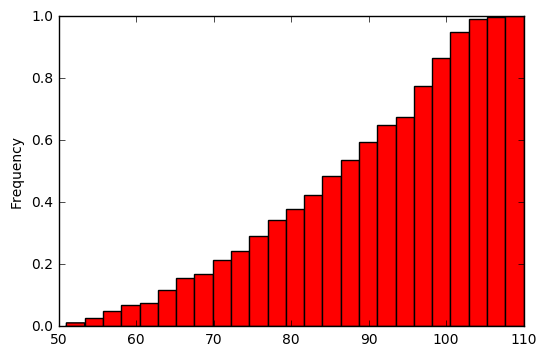

In [139]:
august_2011_high.plot(kind='hist', normed=True, cumulative=True, bins=25)
plt.show()